In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation


In [ ]:
# Loading the datasets
country = pd.read_csv("Metadata_Country.csv")
population = pd.read_csv("country_population.csv")
fertility_rate = pd.read_csv("fertility_rate.csv")
life_expectancy = pd.read_csv("life_expectancy.csv")

In [ ]:
# Initial exploration of the datasets
print(country.shape)
print(population.shape)
print(fertility_rate.shape)
print(life_expectancy.shape)

(263, 6)
(264, 61)
(264, 61)
(264, 61)


In [ ]:
print(country.head())
print(population.head())
print(fertility_rate.head())
print(life_expectancy.head())

  Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFG                 South Asia           Low income   
2          AGO         Sub-Saharan Africa  Lower middle income   
3          ALB      Europe & Central Asia  Upper middle income   
4          AND      Europe & Central Asia          High income   

                                        SpecialNotes    TableName  Unnamed: 5  
0  SNA data for 2000-2011 are updated from offici...        Aruba         NaN  
1  Fiscal year end: March 20; reporting period fo...  Afghanistan         NaN  
2                                                NaN       Angola         NaN  
3                                                NaN      Albania         NaN  
4  WB-3 code changed from ADO to AND to align wit...      Andorra         NaN  
  Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total 

In [ ]:
# Selecting necessary columns from country dataset
country = country[['Country Code', 'Region']]
print(country.head())

  Country Code                     Region
0          ABW  Latin America & Caribbean
1          AFG                 South Asia
2          AGO         Sub-Saharan Africa
3          ALB      Europe & Central Asia
4          AND      Europe & Central Asia


In [ ]:
# Preprocessing population dataset
population.drop(['Country Name', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
population.dropna(axis=0, inplace=True)
years = [str(y) for y in range(1960, 2017)]
population = pd.melt(population, id_vars='Country Code', value_vars=years, var_name='Year', value_name='Population')
print(population.head())

  Country Code  Year  Population
0          ABW  1960     54211.0
1          AFG  1960   8996351.0
2          AGO  1960   5643182.0
3          ALB  1960   1608800.0
4          AND  1960     13411.0


In [ ]:
# Define preprocess function
def preprocess_df(df, value_name):
    """ remove missing values and put years in one column

    Parameters
    ----------
    df: dataframe
        the data that needs to be preprocessed

    value_name: string
        the name of the column that will contain the year's data

    Return
    ------
    preprocessed dataframe
    """
    years = [str(y) for y in range(1960, 2017)]
    df.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)
    df.dropna(axis=0, inplace=True)
    df = pd.melt(df, id_vars='Country Code', value_vars=years, var_name='Year', value_name=value_name)
    return df

In [ ]:
# Preprocessing other datasets
fertility_rate = preprocess_df(fertility_rate, 'Fertility Rate')
life_expectancy = preprocess_df(life_expectancy, 'Life Expectancy')

In [ ]:
print(fertility_rate.head())
print(life_expectancy.head())

  Country Code  Year  Fertility Rate
0          ABW  1960        4.820000
1          AFG  1960        7.450000
2          AGO  1960        7.478000
3          ALB  1960        6.489000
4          ARB  1960        6.948747
  Country Code  Year  Life Expectancy
0          ABW  1960        65.662000
1          AFG  1960        32.292000
2          AGO  1960        33.251000
3          ALB  1960        62.279000
4          ARB  1960        46.825065


In [ ]:
# Merging datasets
df = pd.merge(country, population, how='left', on='Country Code')
df = pd.merge(df, fertility_rate, how='left', on=['Country Code', 'Year'])
df = pd.merge(df, life_expectancy, how='left', on=['Country Code', 'Year'])

In [ ]:
print(df.head())

  Country Code                     Region  Year  Population  Fertility Rate  \
0          ABW  Latin America & Caribbean  1960     54211.0           4.820   
1          ABW  Latin America & Caribbean  1961     55438.0           4.655   
2          ABW  Latin America & Caribbean  1962     56225.0           4.471   
3          ABW  Latin America & Caribbean  1963     56695.0           4.271   
4          ABW  Latin America & Caribbean  1964     57032.0           4.059   

   Life Expectancy  
0           65.662  
1           66.074  
2           66.444  
3           66.787  
4           67.113  


In [ ]:
# Data Cleaning: Filling missing values
df['Population'] = df['Population'].fillna(method='ffill').fillna(method='bfill')
df['Fertility Rate'] = df['Fertility Rate'].fillna(method='ffill').fillna(method='bfill')
df['Life Expectancy'] = df['Life Expectancy'].fillna(method='ffill').fillna(method='bfill')

In [ ]:
# Check for remaining missing values
print(df.isna().sum())

Country Code          0
Region             2622
Year                  5
Population            0
Fertility Rate        0
Life Expectancy       0
dtype: int64


In [ ]:
# Convert 'Year' to numeric
df['Year'] = pd.to_numeric(df['Year'])

In [ ]:
# Save the cleaned and merged dataset (For the dataset goto the files section )
df.to_csv('cleaned_merged_data.csv', index=False)

### Basic Visualizations

<ipython-input-18-b532fc29e476>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Population', hue='Region', ci=None)


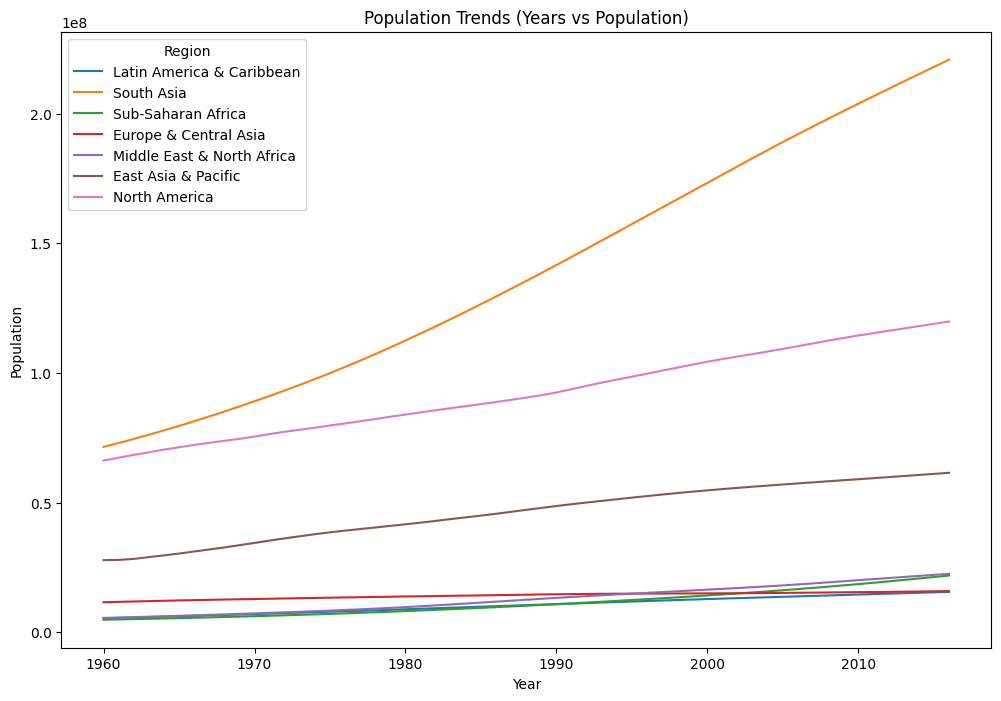

In [ ]:
# Population Trends (Years vs Population) (Line Graph)
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Year', y='Population', hue='Region', ci=None)
plt.title('Population Trends (Years vs Population)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Region')
plt.show()

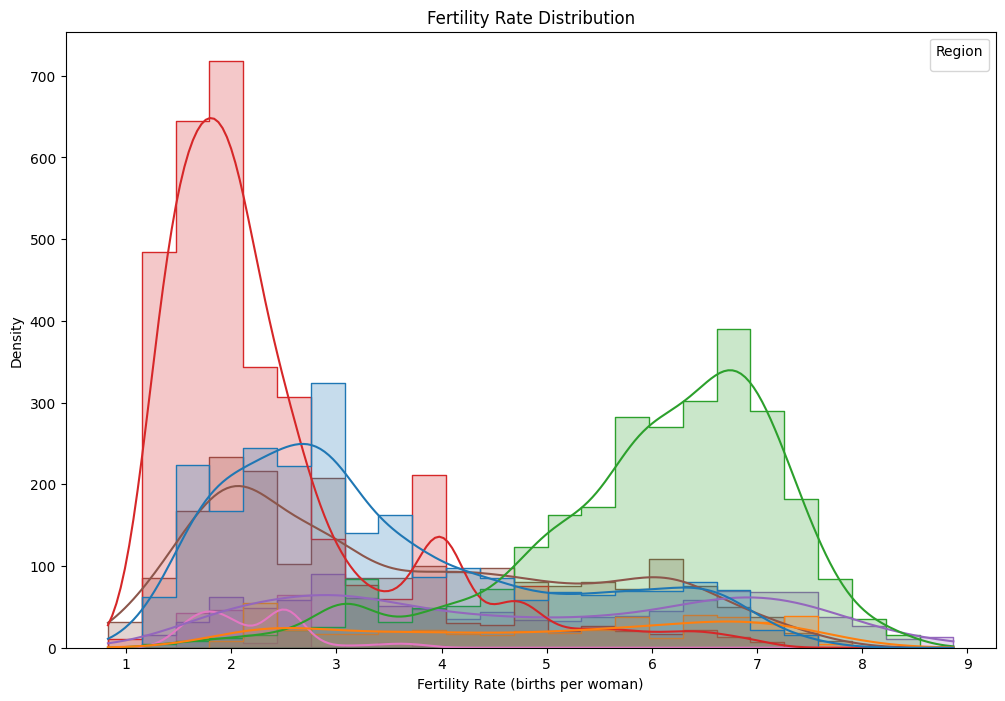

In [ ]:
# Fertility Rate Distribution
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Fertility Rate', hue='Region', element='step', kde=True)
plt.title('Fertility Rate Distribution')
plt.xlabel('Fertility Rate (births per woman)')
plt.ylabel('Density')
plt.legend(title='Region')
plt.show()

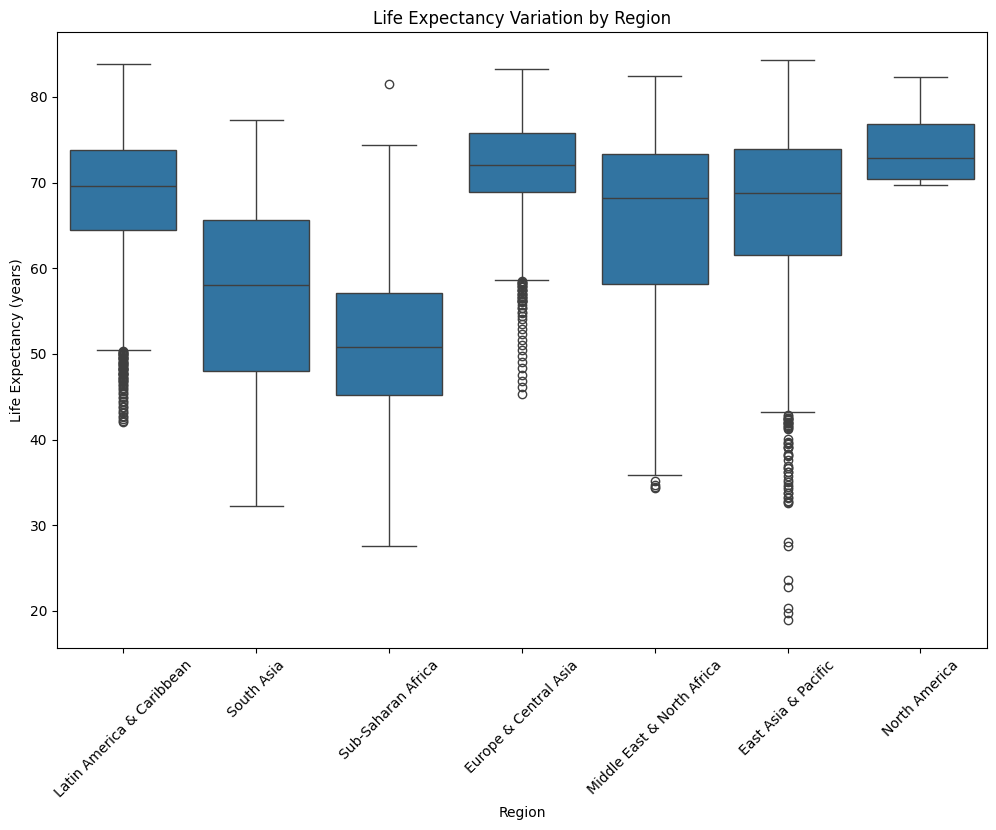

In [ ]:
# Life Expectancy Variation
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Region', y='Life Expectancy')
plt.title('Life Expectancy Variation by Region')
plt.xlabel('Region')
plt.ylabel('Life Expectancy (years)')
plt.xticks(rotation=45)
plt.show()

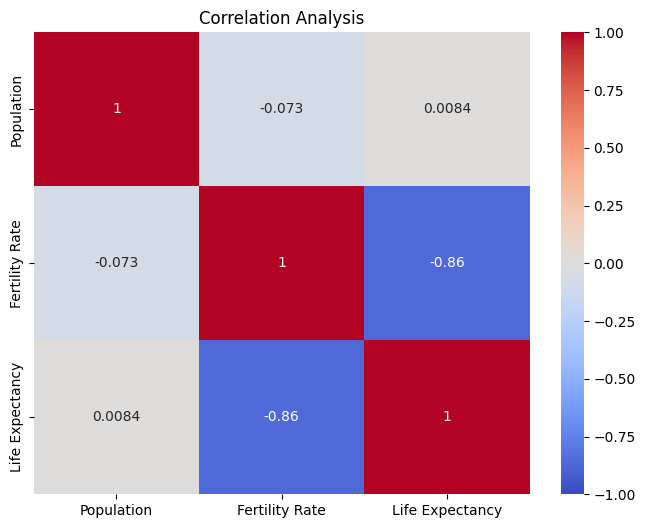

In [ ]:
# Correlation Analysis
corr_matrix = df[['Population', 'Fertility Rate', 'Life Expectancy']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Analysis')
plt.show()

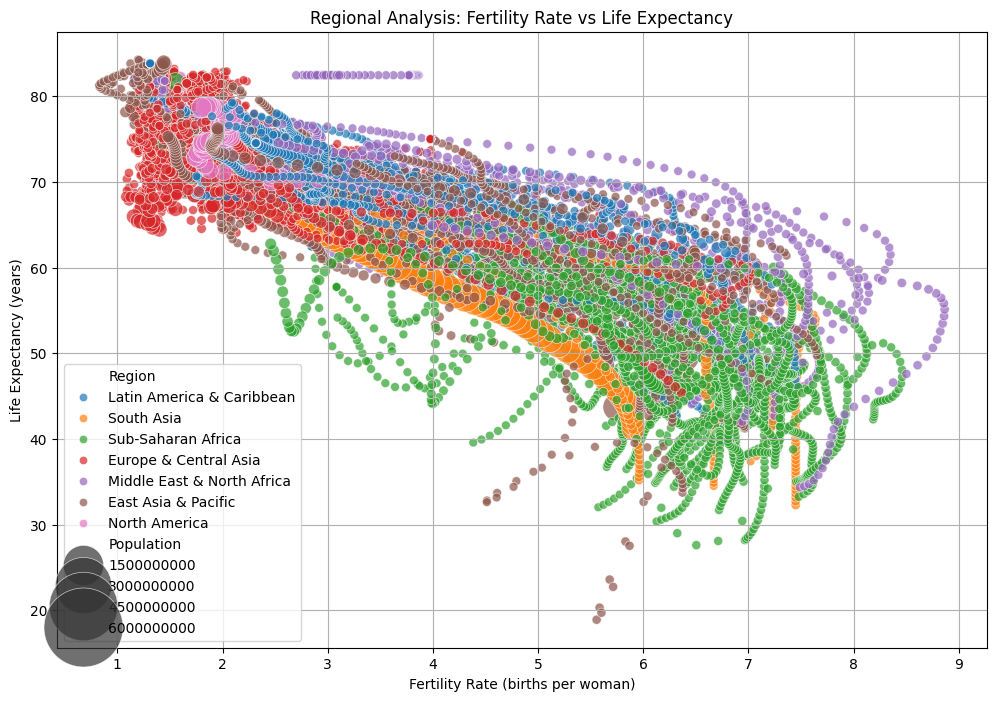

In [ ]:
# Regional Analysis
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Fertility Rate', y='Life Expectancy', size='Population',
                sizes=(40, 4000), hue='Region', alpha=0.7, legend=True)
plt.title('Regional Analysis: Fertility Rate vs Life Expectancy')
plt.xlabel('Fertility Rate (births per woman)')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.show()

# Animated Bubble Chart

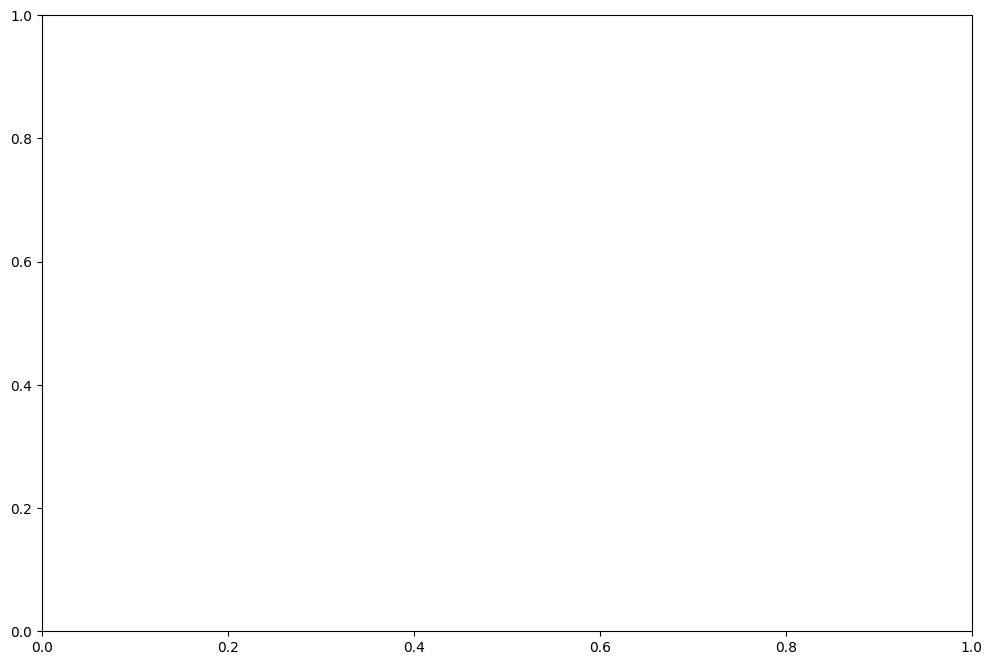

In [ ]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

In [ ]:
# Function to create the bubble chart for a given year
def update(year):
    ax.clear()
    data = df[df['Year'] == year]
    sns.scatterplot(data=data, x='Fertility Rate', y='Life Expectancy', size='Population',
                    sizes=(40, 4000), hue='Region', alpha=0.7, legend=False, ax=ax)
    ax.set_title(f'Year: {year}')
    ax.set_xlabel('Fertility Rate (births per woman)')
    ax.set_ylabel('Life Expectancy (years)')
    ax.set_xlim(0, 9)
    ax.set_ylim(20, 85)
    ax.grid(True)

In [ ]:
# Create the animation
years = df['Year'].unique()
ani = animation.FuncAnimation(fig, update, frames=years, repeat=False)

In [ ]:
# Save the animation as an mp4 file (For the animation lookup the file section )
ani.save('bubble_chart_animation.mp4', writer='ffmpeg', fps=2)

In [ ]:
# Display the animation
plt.show()

###Check out the saved file to see the Output. The file's name is bubble_chart_animation.mp4.

In [ ]:
import plotly.express as px

# This is the interactive Animation with Plotly
fig = px.scatter(df, x='Fertility Rate', y='Life Expectancy', animation_frame='Year', animation_group='Country Code',
                 size='Population', color='Region', hover_name='Country Code',
                 range_x=[0, 9], range_y=[20, 85], size_max=100,  # Increased the size for larger bubbles the default one are small and graph was not clear
                 labels={'Fertility Rate': 'Fertility Rate (births per woman)',
                         'Life Expectancy': 'Life Expectancy (years)'},
                 title='Fertility Rate vs Life Expectancy (1960-2016)')

fig.update_layout(transition=dict(duration=300), xaxis=dict(title='Fertility Rate (births per woman)'),
                  yaxis=dict(title='Life Expectancy (years)'), title_x=0.5)

fig.show()
